In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [7]:
resumDT=pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')
resumDT.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [8]:
resumDT['cleaned']=''
resumDT

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [9]:
resumDT['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [10]:
resumDT['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Blockchain                   40
ETL Developer                40
Mechanical Engineer          40
Operations Manager           40
Sales                        40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

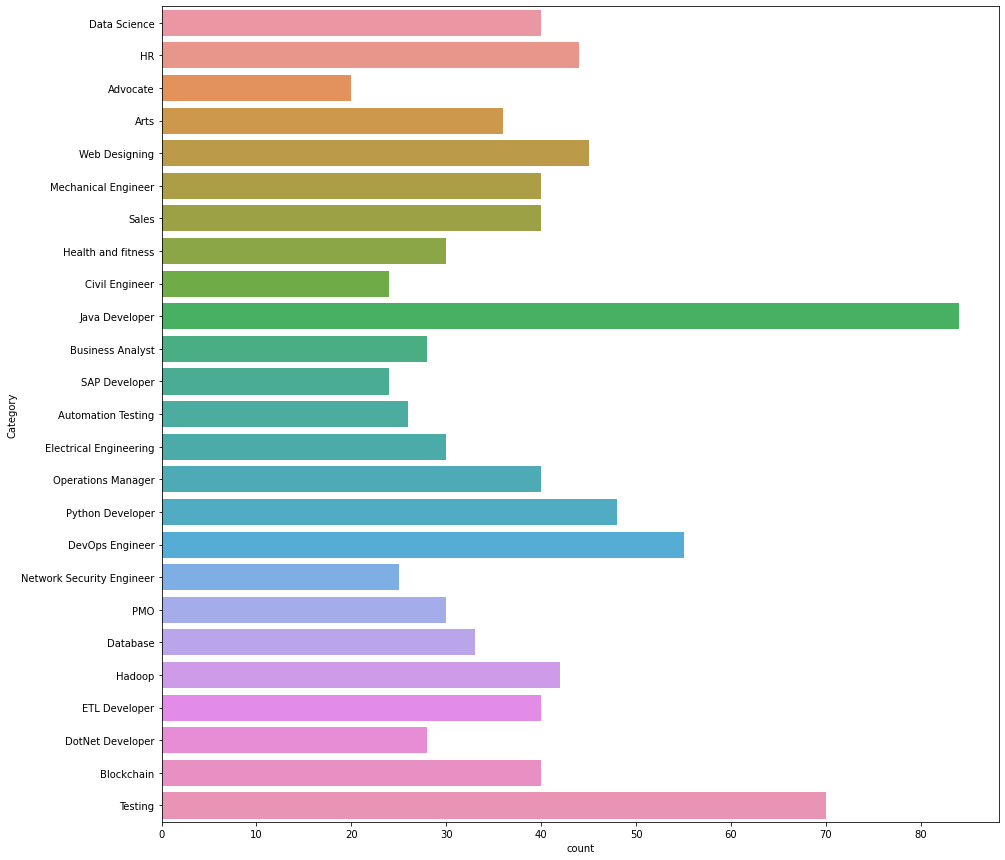

In [15]:
import seaborn as sns
plt.figure(figsize=(15,15))
#plt.xticks(rotation=90)
sns.countplot(y='Category',data=resumDT)

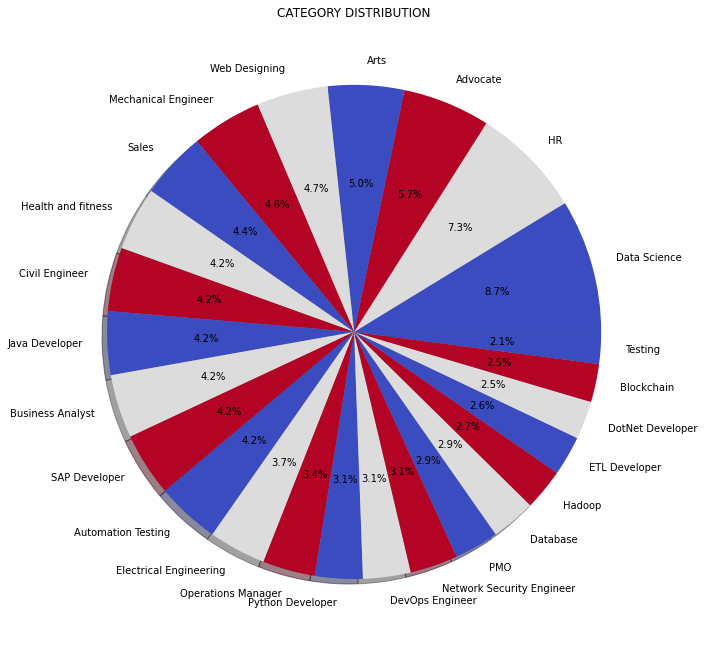

In [16]:
from matplotlib.gridspec import GridSpec
targetCounts = resumDT['Category'].value_counts()
targetLabels  = resumDT['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [17]:
import re

In [19]:
def cleaningf(resumcont):
    resumcont=re.sub('http\S+\s*', ' ', resumcont)
    resumcont=re.sub('RT|cc', ' ', resumcont)
    resumcont=re.sub('#\S+', '', resumcont)
    resumcont=re.sub('@\S+', '  ', resumcont)
    resumcont=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumcont)
    resumcont=re.sub(r'[^\x00-\x7f]',r' ', resumcont)
    resumcont=re.sub('\s+', ' ', resumcont)
    return resumcont
resumDT['cleaned']=resumDT.Resume.apply(lambda x: cleaningf(x))
    

In [21]:
resumDT['cleaned'].head(40)

0     Skills Programming Languages Python pandas num...
1     Education Details May 2013 to May 2017 B E UIT...
2     Areas of Interest Deep Learning Control System...
3     Skills R Python SAP HANA Tableau SAP HANA SQL ...
4     Education Details MCA YMCAUST Faridabad Haryan...
5     SKILLS C Basics IOT Python MATLAB Data Science...
6     Skills Python Tableau Data Visualization R Stu...
7     Education Details B Tech Rayat and Bahra Insti...
8     Personal Skills Ability to quickly grasp techn...
9     Expertise Data and Quantitative Analysis Decis...
10    Skills Programming Languages Python pandas num...
11    Education Details May 2013 to May 2017 B E UIT...
12    Areas of Interest Deep Learning Control System...
13    Skills R Python SAP HANA Tableau SAP HANA SQL ...
14    Education Details MCA YMCAUST Faridabad Haryan...
15    SKILLS C Basics IOT Python MATLAB Data Science...
16    Skills Python Tableau Data Visualization R Stu...
17    Education Details B Tech Rayat and Bahra I

In [23]:
pip install wordcloud 

In [28]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


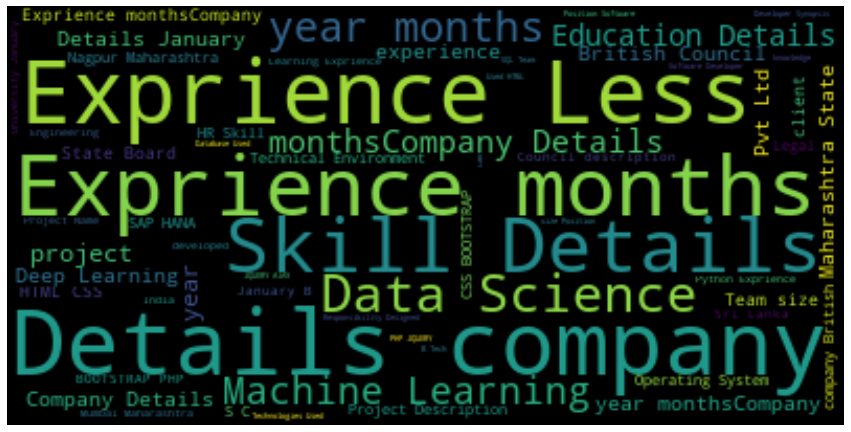

In [29]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumDT['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleaningf(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumDT[i] = le.fit_transform(resumDT[i])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

reqText=resumDT['cleaned'].values
reqTarget=resumDT['Category'].values
word_vetrz=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vetrz.fit(reqText)
WordFeatures = word_vetrz.transform(reqText)
##TfidfVectorizer Convert a collection of raw documents to a matrix of TF-IDF features.
print (WordFeatures[:])

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,reqTarget,random_state=2, test_size=0.2)
print(X_train.shape)
print(X_test.shape) 

  (0, 1497)	0.030442872257393377
  (0, 1484)	0.034531750632907525
  (0, 1482)	0.1138465211736939
  (0, 1460)	0.07093131129419672
  (0, 1451)	0.033309013428457386
  (0, 1442)	0.03203670321153616
  (0, 1440)	0.08546898208818157
  (0, 1439)	0.04080461724681855
  (0, 1436)	0.05680440806960008
  (0, 1420)	0.04659756799177676
  (0, 1419)	0.0503923714674369
  (0, 1389)	0.08368776039571268
  (0, 1388)	0.11957568503304351
  (0, 1382)	0.0636917041233275
  (0, 1376)	0.1487996917738002
  (0, 1371)	0.06899078914578757
  (0, 1365)	0.0531162184530022
  (0, 1364)	0.0815286030249583
  (0, 1362)	0.05813765391929385
  (0, 1358)	0.025538351209887553
  (0, 1344)	0.1499576218829958
  (0, 1343)	0.05681550781284476
  (0, 1309)	0.0646209141904646
  (0, 1299)	0.05319383005661842
  (0, 1286)	0.0346379947929267
  :	:
  (961, 338)	0.13437601229264157
  (961, 318)	0.06693311287776045
  (961, 316)	0.08639977563211801
  (961, 273)	0.025466251941105137
  (961, 260)	0.082314549875185
  (961, 245)	0.10857982774459495
  

In [37]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.98

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         5
           7       0.78      1.00      0.88         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.